In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import seaborn as sns

## Data Import and Preprocessing

### Read in data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
my_path = "/content/gdrive/MyDrive/Project_shared"

os.environ['KAGGLE_CONFIG_DIR'] = my_path

In [ ]:
! cd /content/gdrive/MyDrive/Project_shared

In [ ]:
! kaggle datasets download -d nipunarora8/age-gender-and-ethnicity-face-data-csv

 77% 49.0M/63.2M [00:01<00:00, 41.4MB/s]
100% 63.2M/63.2M [00:01<00:00, 48.9MB/s]


In [ ]:
! unzip \*.zip  && rm *.zip

Archive:  age-gender-and-ethnicity-face-data-csv.zip
  inflating: age_gender.csv          


In [ ]:
df  = pd.read_csv('/content/age_gender.csv')

In [ ]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


### Cleaning and Sampling 

In [ ]:
df['pixels_np']=df['pixels'].map(lambda x: np.fromstring(x, sep = ' ', dtype = np.float32).reshape((48,48)), na_action=None)
df['pixels_np'] = df['pixels_np']/255

In [ ]:
df.isnull().sum() # no missing data

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
pixels_np    0
dtype: int64

age          1
ethnicity    2
gender       0
Name: 0, dtype: object


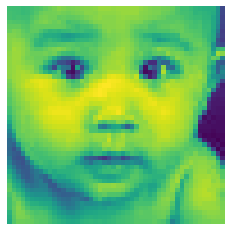

In [ ]:
# check
plt.imshow(df.pixels_np[0])
plt.axis('off')
print(df.iloc[0][0:3])

age          1
ethnicity    2
gender       0
Name: 100, dtype: object


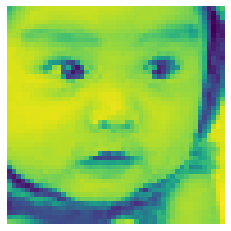

In [ ]:
plt.imshow(df.pixels_np[100])
plt.axis('off')
print(df.iloc[100][0:3])

### Data Augmentation


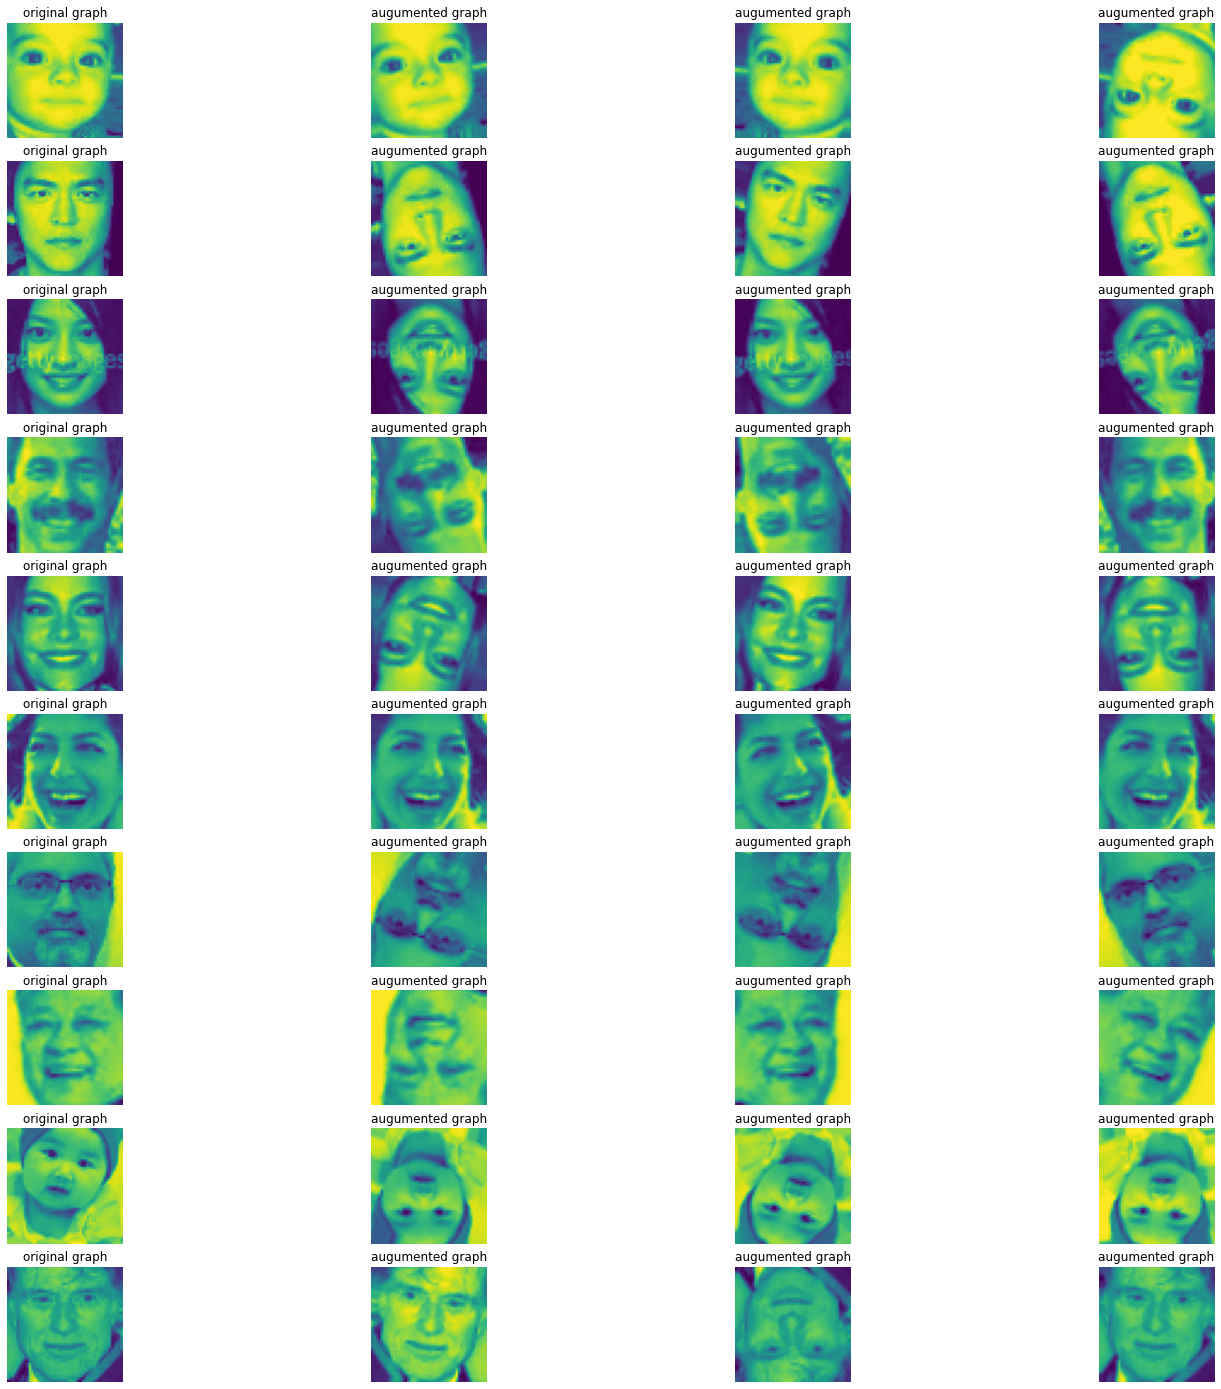

In [ ]:
datagen = ImageDataGenerator(brightness_range=[0.5,1.1],horizontal_flip=True, vertical_flip=True,width_shift_range=1,rotation_range=20, fill_mode='nearest')
fig, ax =plt.subplots(10,4, figsize = (25,25))
np.random.seed(1)
idx = np.random.randint(0, df['pixels'].size, 10)
for i in range(10):
  ax[i,0].imshow(df.pixels_np[idx[i]])
  ax[i,0].set_title('original graph')
  ax[i,0].axis('off')
  for j in range(1,4):
    ax[i,j].imshow(datagen.random_transform(df.pixels_np[idx[i]].reshape((48,48,1))).reshape((48,48)))
    ax[i,j].set_title('augumented graph')
    ax[i,j].axis('off')
plt.show()


## Data Exploration and Visualization

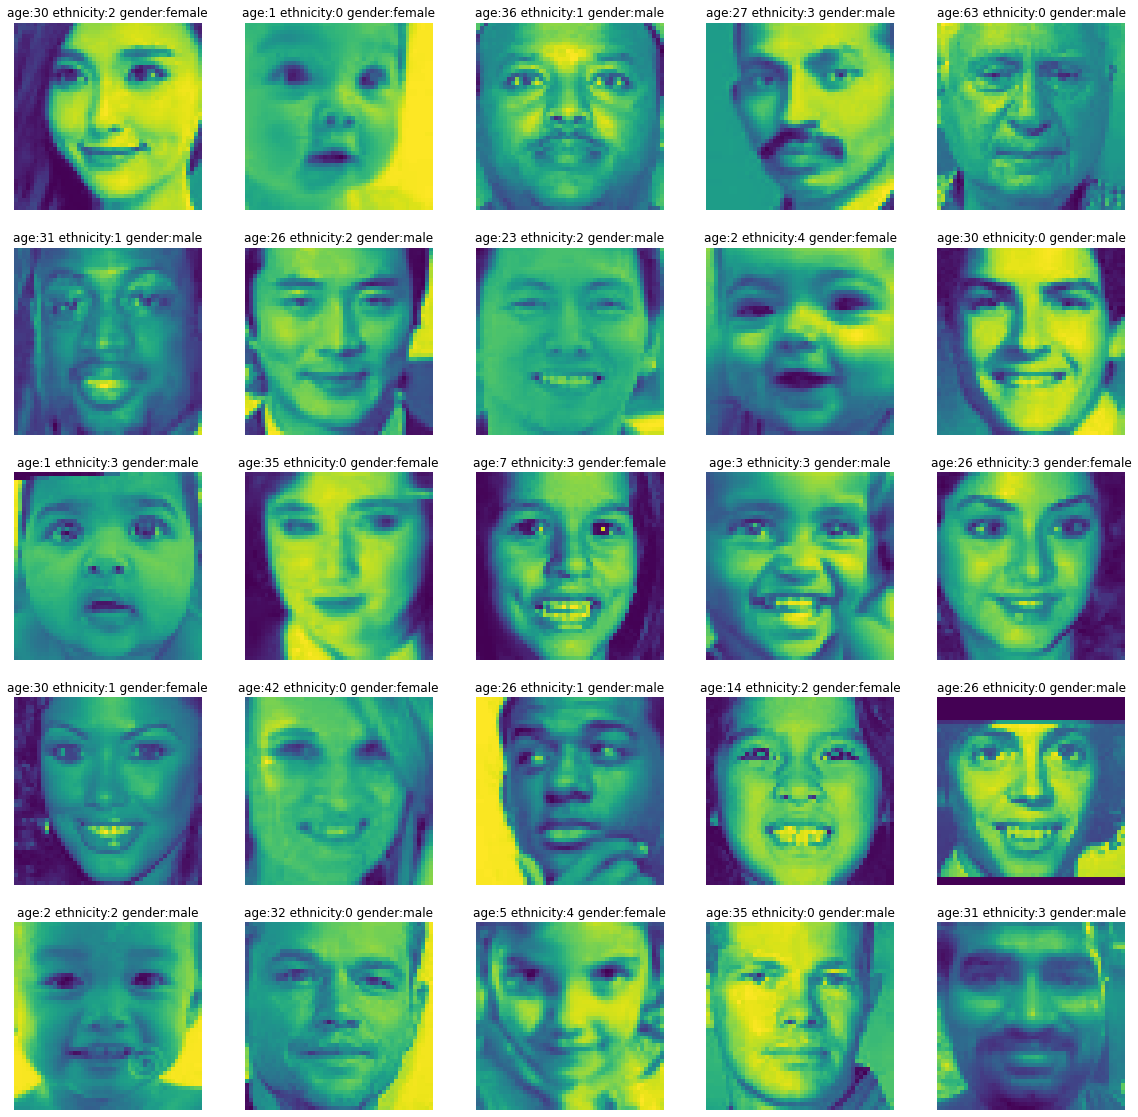

In [ ]:
sampled_data = df.sample(n=25, random_state=1, ignore_index=True)
fig, ax =plt.subplots(5, 5, figsize = (20,20))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(sampled_data.pixels_np[i])
  plt.axis('off')
  if sampled_data.gender[i] == 0:
    gender = 'male'
  else: gender = 'female'
  plt.title('age:'+str(sampled_data.age[i])+' ethnicity:'+str(sampled_data.ethnicity[i])+' gender:'+gender)

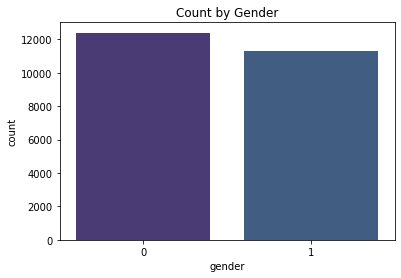

In [ ]:
sns.set_palette("viridis")
gender_plot = sns.countplot(x = 'gender'  ,data = df ).set(title='Count by Gender')
plt.show()

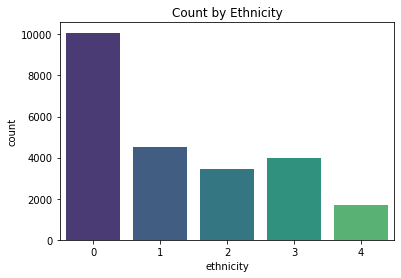

In [ ]:
eth_plot = sns.countplot(x = 'ethnicity'  ,data = df ).set(title='Count by Ethnicity')
plt.show()

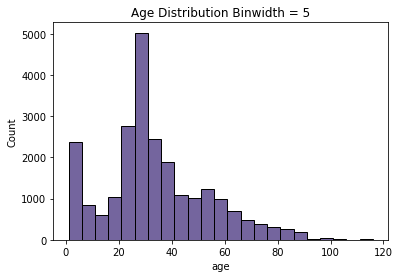

In [ ]:

age_plot1 = sns.histplot(x = 'age',data =df, binwidth = 5).set(title='Age Distribution Binwidth = 5')

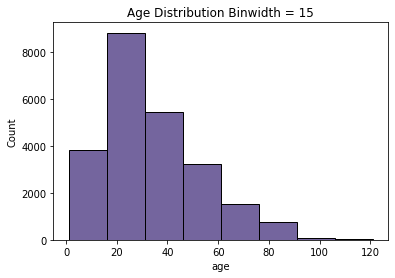

In [ ]:

age_plot1 = sns.histplot(x = 'age',data =df, binwidth = 15).set(title='Age Distribution Binwidth = 15')

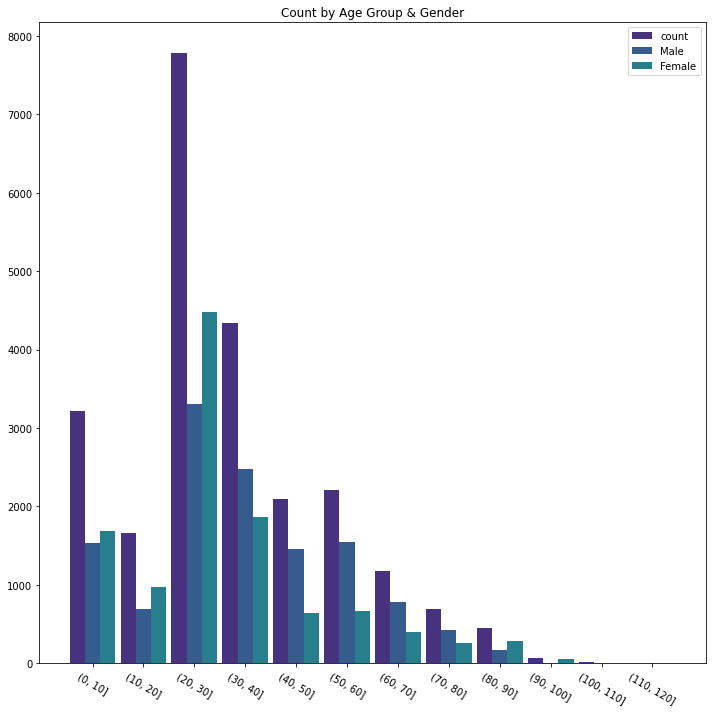

In [ ]:
#bin age and see gender difference of each bin
df['age_bins'] = pd.cut(x=df['age'], bins=[0,10,20, 30, 40, 50,60,70,80,90,100,110,120])
ct=df['age_bins'].value_counts(sort=False).reset_index(name = "count")
grouped = df.groupby(['age_bins','gender'])
x_axis = np.arange(len(ct))
x_axis = np.array([2*i for i in x_axis])
gender_count=grouped['gender'].count().reset_index(name = "count")
fig, ax = plt.subplots(figsize = (10, 10))
rect1 = ax.bar(x_axis - 0.6,ct['count'], width = 0.6, label = 'count')
rect2 = ax.bar(x_axis, gender_count[gender_count['gender'] == 0]['count'], width =0.6, label = 'Male')
rect3 = ax.bar(x_axis + 0.6, gender_count[gender_count['gender'] == 1]['count'], width =0.6, label = 'Female')
plt.xticks(x_axis, labels = ct['index'])
ax.tick_params(axis='x',rotation=-30, labelsize = 10)
ax.legend()
plt.title('Count by Age Group & Gender')
fig.tight_layout()

In [ ]:
df_twenties = df[df['age'].isin(range(21,31))]

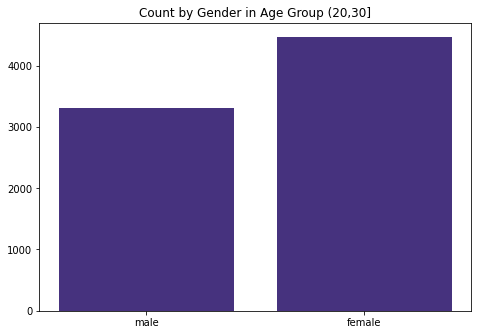

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
genders = ['male', 'female']
counts = [len(df_twenties[df_twenties['gender'] == 0]), len(df_twenties[df_twenties['gender'] == 1])]
ax.bar(genders,counts)
plt.title('Count by Gender in Age Group (20,30]')
plt.show()

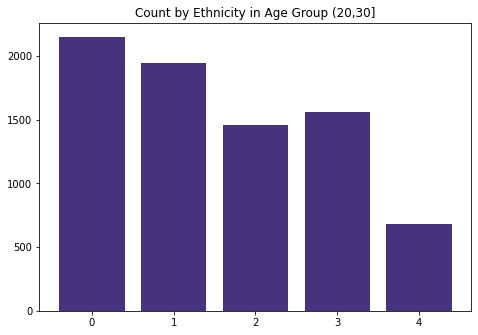

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ethnicity = df_twenties['ethnicity'].unique().tolist()
counts = []
for e in ethnicity:
  counts.append(len(df_twenties[df_twenties['ethnicity'] == e]))
ax.bar(ethnicity,counts)
plt.title('Count by Ethnicity in Age Group (20,30]')
plt.show()

## ML Models

#### Imports 


In [ ]:
#importing libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import Sequential
import tensorflow as tf
from keras.layers import Dense
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.layers import Conv2D
from keras.layers.normalization.batch_normalization import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

In [ ]:
def train_test_val_split(X,y):
  x_dev, x_test, y_dev, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
  x_train, x_val, y_train, y_val = train_test_split(x_dev, y_dev, test_size = 0.3, random_state = 1)

  return x_train,y_train,x_val,y_val,x_test,y_test

In [ ]:
def plot_epochs(history):
  
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  fig,ax = plt.subplots(2,1 , figsize=(5, 10))

  ax[0].set_title('Train and Val accuracy')
  ax[0].plot(epochs, acc, color='blue', label='Training Data')
  ax[0].plot(epochs, val_acc, color='orange', label='Validation Data')
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Accuracy')
  ax[0].legend()


  ax[1].set_title('Training and validation loss')
  ax[1].plot(epochs, loss, color='blue', label='Train')
  ax[1].plot(epochs, val_loss, color='orange', label='Val')
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Loss')
  ax[1].legend()

In [ ]:
y_age = df['age'].to_numpy()
y_ethnicity = to_categorical(df['ethnicity'])
y_gender = df['gender'].to_numpy()
x = df['pixels_np']
x=np.stack(x)
x=x.reshape(-1,48,48,1)

#### Gender

##### Baseline

In [ ]:
## first deal with gender, we can apply same trick to ethnicity, and do regression on age

x_train,y_train,x_val,y_val,x_test,y_test = train_test_val_split(x,y_gender)

In [ ]:
model1 = Sequential()
model1.add(layers.Conv2D(16, kernel_size=(2,2),input_shape=(48,48,1),activation = 'relu'))
model1.add(layers.MaxPooling2D())
model1.add(layers.Conv2D(32, kernel_size=(2,2),activation = 'relu'))
model1.add(layers.MaxPooling2D())
model1.add(layers.Conv2D(64, kernel_size=(2,2),activation = 'relu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Flatten())
model1.add(layers.Dense(64))
model1.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 47, 47, 16)        80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        8256      
                                                                 
 dropout (Dropout)           (None, 10, 10, 64)        0

In [ ]:
from keras.backend import binary_crossentropy
model1.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['acc'])
history1 = model1.fit(x_train,y_train,
                      validation_data = (x_val,y_val),
                      batch_size = 32,
                      epochs = 15)

Epoch 1/15
415/415 [==============================] - 15s 12ms/step - loss: 0.4737 - acc: 0.7726 - val_loss: 0.3665 - val_acc: 0.8374
Epoch 2/15
415/415 [==============================] - 4s 10ms/step - loss: 0.3638 - acc: 0.8420 - val_loss: 0.3587 - val_acc: 0.8450
Epoch 3/15
415/415 [==============================] - 5s 12ms/step - loss: 0.3330 - acc: 0.8548 - val_loss: 0.3136 - val_acc: 0.8640
Epoch 4/15
415/415 [==============================] - 4s 10ms/step - loss: 0.3080 - acc: 0.8694 - val_loss: 0.3035 - val_acc: 0.8726
Epoch 5/15
415/415 [==============================] - 5s 12ms/step - loss: 0.2958 - acc: 0.8756 - val_loss: 0.3031 - val_acc: 0.8756
Epoch 6/15
415/415 [==============================] - 5s 12ms/step - loss: 0.2875 - acc: 0.8784 - val_loss: 0.3151 - val_acc: 0.8612
Epoch 7/15
415/415 [==============================] - 5s 12ms/step - loss: 0.2759 - acc: 0.8845 - val_loss: 0.2875 - val_acc: 0.8770
Epoch 8/15
415/415 [==============================] - 4s 10ms/step -

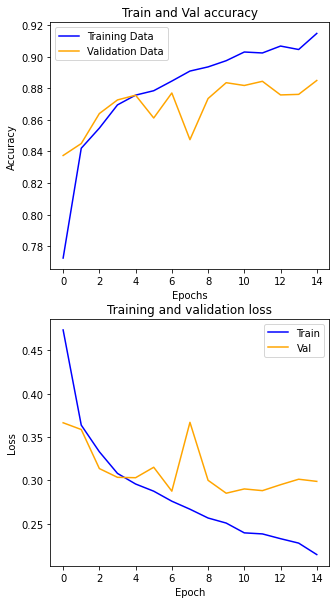

In [ ]:
plot_epochs(history1)

In [ ]:
scores=model1.evaluate(x_test,y_test)
print("Test loss {:.3f}".format(scores[0]))
print("Test acc {:.3f}".format(scores[1]))

149/149 [==============================] - 1s 6ms/step - loss: 0.2645 - acc: 0.8888
Test loss 0.264
Test acc 0.889


##### Complex Model

In [ ]:
# Add here
model2 = Sequential()
model2.add(layers.Conv2D(16, kernel_size=(2,2),input_shape=(48,48,1),activation = 'relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(32, kernel_size=(2,2),activation = 'relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(64, kernel_size=(2,2),activation = 'relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(128, kernel_size=(2,2),activation = 'relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(256, kernel_size=(2,2),activation = 'relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Flatten())
model2.add(layers.Dense(256))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.summary() 

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 47, 47, 16)        80        
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 23, 23, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_32 (Bat  (None, 23, 23, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_36 (Conv2D)          (None, 22, 22, 32)        2080      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                      

In [ ]:
from keras.backend import binary_crossentropy
model2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['acc'])
history2 = model2.fit(x_train,y_train,
                      validation_data = (x_val,y_val),
                      batch_size = 32,
                      epochs = 15)

Epoch 1/15
415/415 [==============================] - 4s 8ms/step - loss: 0.5173 - acc: 0.7699 - val_loss: 0.4885 - val_acc: 0.7510
Epoch 2/15
415/415 [==============================] - 3s 7ms/step - loss: 0.3363 - acc: 0.8501 - val_loss: 0.3595 - val_acc: 0.8327
Epoch 3/15
415/415 [==============================] - 3s 8ms/step - loss: 0.2753 - acc: 0.8817 - val_loss: 0.3056 - val_acc: 0.8682
Epoch 4/15
415/415 [==============================] - 3s 7ms/step - loss: 0.2409 - acc: 0.8975 - val_loss: 0.3955 - val_acc: 0.8265
Epoch 5/15
415/415 [==============================] - 3s 7ms/step - loss: 0.2158 - acc: 0.9102 - val_loss: 0.3170 - val_acc: 0.8620
Epoch 6/15
415/415 [==============================] - 3s 8ms/step - loss: 0.1892 - acc: 0.9232 - val_loss: 0.3585 - val_acc: 0.8541
Epoch 7/15
415/415 [==============================] - 3s 8ms/step - loss: 0.1613 - acc: 0.9340 - val_loss: 0.3485 - val_acc: 0.8634
Epoch 8/15
415/415 [==============================] - 3s 7ms/step - loss: 0.

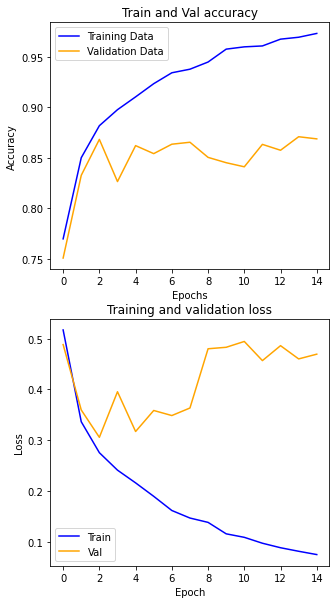

In [ ]:
plot_epochs(history2)

In [ ]:
scores=model2.evaluate(x_test,y_test)
print("Test loss {:.3f}".format(scores[0]))
print("Test acc {:.3f}".format(scores[1]))

149/149 [==============================] - 1s 4ms/step - loss: 0.4492 - acc: 0.8722
Test loss 0.449
Test acc 0.872


##### Transfer Learning

In [ ]:
# Add here
x.shape
x_tl = x.repeat(3, axis=-1)
x_tl.shape

(23705, 48, 48, 3)

In [ ]:
## first deal with gender, we can apply same trick to ethnicity, and do regression on age

x_train_tl,y_train,x_val_tl,y_val,x_test,y_test = train_test_val_split(x_tl,y_gender)

In [ ]:
from keras.applications.vgg16 import VGG16 

vgg= VGG16(include_top= False,weights="imagenet",input_shape=(48,48,3))

print(vgg.summary())

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

In [ ]:
vgg_layer_list= vgg.layers 

model= Sequential()

for layer in vgg_layer_list: 
    model.add(layer)        

for layer in model.layers:
    layer.trainable= False 

model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 12, 12, 256)      

In [ ]:
from keras.backend import binary_crossentropy
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['acc'])
history = model.fit(x_train_tl,y_train,
                      validation_data 
                      = (x_val_tl,y_val),
                      batch_size = 32,
                      epochs = 15)

Epoch 1/15
415/415 [==============================] - 19s 42ms/step - loss: 0.5588 - acc: 0.7100 - val_loss: 0.5035 - val_acc: 0.7513
Epoch 2/15
415/415 [==============================] - 17s 40ms/step - loss: 0.5068 - acc: 0.7501 - val_loss: 0.4743 - val_acc: 0.7729
Epoch 3/15
415/415 [==============================] - 17s 40ms/step - loss: 0.4826 - acc: 0.7683 - val_loss: 0.4786 - val_acc: 0.7506
Epoch 4/15
415/415 [==============================] - 17s 40ms/step - loss: 0.4686 - acc: 0.7743 - val_loss: 0.4724 - val_acc: 0.7754
Epoch 5/15
415/415 [==============================] - 17s 40ms/step - loss: 0.4630 - acc: 0.7779 - val_loss: 0.5021 - val_acc: 0.7562
Epoch 6/15
415/415 [==============================] - 17s 40ms/step - loss: 0.4509 - acc: 0.7818 - val_loss: 0.4485 - val_acc: 0.7863
Epoch 7/15
415/415 [==============================] - 18s 44ms/step - loss: 0.4425 - acc: 0.7867 - val_loss: 0.4457 - val_acc: 0.7859
Epoch 8/15
415/415 [==============================] - 17s 40ms

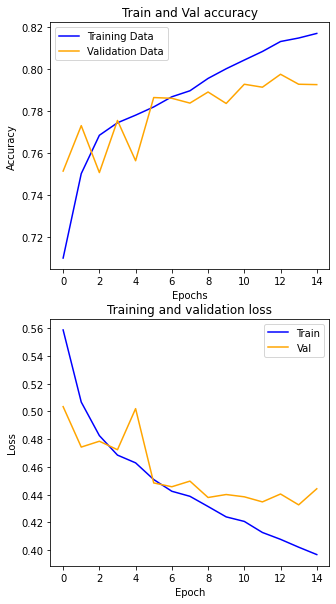

In [ ]:
plot_epochs(history)

In [ ]:
scores=model.evaluate(x_test,y_test)
print("Test loss {:.3f}".format(scores[0]))
print("Test acc {:.3f}".format(scores[1]))

149/149 [==============================] - 5s 31ms/step - loss: 0.4409 - acc: 0.7876
Test loss 0.441
Test acc 0.788


#### Ethnicity

##### Baseline

In [ ]:
y_ethnicity = df['ethnicity']
x=df['pixels_np']
x=np.stack(x)
x=x.reshape(-1,48,48,1)
x_train,y_train,x_val,y_val,x_test,y_test = train_test_val_split(x,y_ethnicity)

In [ ]:
n_classes = 5
y_val = to_categorical(y_val, 5)
y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test, 5)

In [ ]:
model1 = Sequential()
model1.add(layers.Conv2D(16, kernel_size=(2,2),input_shape=(48,48,1),activation = 'relu'))
model1.add(layers.MaxPooling2D())
model1.add(layers.Conv2D(32, kernel_size=(2,2),activation = 'relu'))
model1.add(layers.MaxPooling2D())
model1.add(layers.Conv2D(64, kernel_size=(2,2),activation = 'relu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Flatten())
model1.add(layers.Dense(64))
model1.add(layers.Dense(n_classes,activation='softmax'))

In [ ]:
model1.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['acc'])
history1 = model1.fit(x_train,y_train,
                      validation_data = (x_val,y_val),
                      batch_size = 32,
                      epochs = 15)

Epoch 1/15
415/415 [==============================] - 5s 10ms/step - loss: 1.0811 - acc: 0.5948 - val_loss: 0.9167 - val_acc: 0.6726
Epoch 2/15
415/415 [==============================] - 4s 9ms/step - loss: 0.8222 - acc: 0.7093 - val_loss: 0.7670 - val_acc: 0.7274
Epoch 3/15
415/415 [==============================] - 4s 11ms/step - loss: 0.7464 - acc: 0.7344 - val_loss: 0.7375 - val_acc: 0.7336
Epoch 4/15
415/415 [==============================] - 5s 11ms/step - loss: 0.6952 - acc: 0.7531 - val_loss: 0.7296 - val_acc: 0.7373
Epoch 5/15
415/415 [==============================] - 4s 9ms/step - loss: 0.6592 - acc: 0.7677 - val_loss: 0.7256 - val_acc: 0.7483
Epoch 6/15
415/415 [==============================] - 5s 11ms/step - loss: 0.6340 - acc: 0.7790 - val_loss: 0.6916 - val_acc: 0.7608
Epoch 7/15
415/415 [==============================] - 5s 11ms/step - loss: 0.5977 - acc: 0.7873 - val_loss: 0.6819 - val_acc: 0.7624
Epoch 8/15
415/415 [==============================] - 4s 9ms/step - los

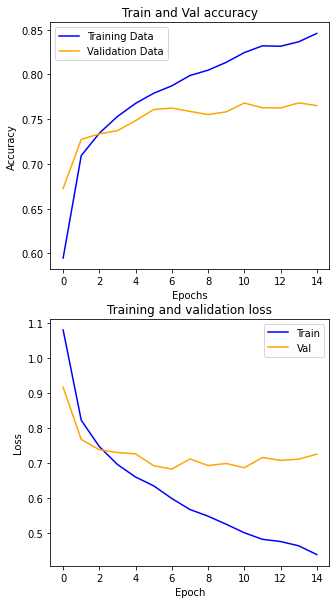

In [ ]:
plot_epochs(history1)

In [ ]:
scores=model1.evaluate(x_test,y_test)
print("Test loss {:.3f}".format(scores[0]))
print("Test acc {:.3f}".format(scores[1]))

149/149 [==============================] - 1s 5ms/step - loss: 0.7234 - acc: 0.7684
Test loss 0.723
Test acc 0.768


##### Complex Model

In [ ]:

model2 = Sequential()
model2.add(layers.Conv2D(16, kernel_size=(2,2),input_shape=(48,48,1),activation = 'relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(32, kernel_size=(2,2),activation = 'relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(64, kernel_size=(2,2),activation = 'relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(128, kernel_size=(2,2),activation = 'relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.BatchNormalization())
model2.add(layers.Flatten())
model2.add(layers.Dense(128))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(n_classes,activation='sigmoid'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 47, 47, 16)        80        
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 23, 23, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 23, 23, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_21 (Conv2D)          (None, 22, 22, 32)        2080      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                      

In [ ]:
model2.compile(optimizer='adam' ,loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
history2 = model2.fit(
    x_train,y_train,
    validation_data = (x_val,y_val),
    batch_size = 32,
    epochs = 15
)

Epoch 1/15
415/415 [==============================] - 6s 12ms/step - loss: 1.1991 - acc: 0.5944 - val_loss: 1.3295 - val_acc: 0.5004
Epoch 2/15
415/415 [==============================] - 5s 13ms/step - loss: 0.8150 - acc: 0.7184 - val_loss: 0.8783 - val_acc: 0.6873
Epoch 3/15
415/415 [==============================] - 5s 13ms/step - loss: 0.6864 - acc: 0.7610 - val_loss: 0.7825 - val_acc: 0.7265
Epoch 4/15
415/415 [==============================] - 5s 13ms/step - loss: 0.6010 - acc: 0.7879 - val_loss: 0.8503 - val_acc: 0.7076
Epoch 5/15
415/415 [==============================] - 5s 11ms/step - loss: 0.5369 - acc: 0.8082 - val_loss: 0.7875 - val_acc: 0.7359
Epoch 6/15
415/415 [==============================] - 5s 11ms/step - loss: 0.4905 - acc: 0.8248 - val_loss: 0.8159 - val_acc: 0.7265
Epoch 7/15
415/415 [==============================] - 5s 11ms/step - loss: 0.4280 - acc: 0.8493 - val_loss: 0.8594 - val_acc: 0.7199
Epoch 8/15
415/415 [==============================] - 5s 13ms/step - 

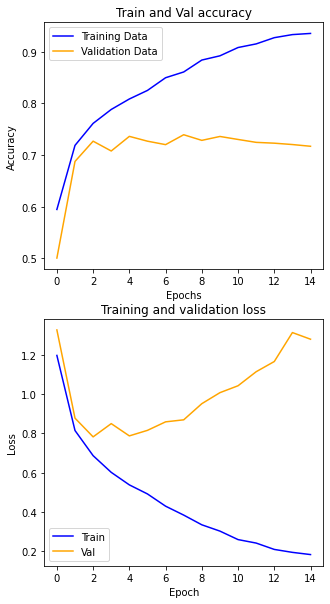

In [ ]:
plot_epochs(history2)

In [ ]:
scores=model2.evaluate(x_test,y_test)
print("Test loss {:.3f}".format(scores[0]))
print("Test acc {:.3f}".format(scores[1]))

149/149 [==============================] - 1s 5ms/step - loss: 1.2746 - acc: 0.7252
Test loss 1.275
Test acc 0.725


##### Transfer Learning

In [ ]:
# Add here
x_tl = x.repeat(3, axis=-1)
x_tl.shape

(23705, 48, 48, 3)

In [ ]:
## first deal with gender, we can apply same trick to ethnicity, and do regression on age

x_train_tl,y_train,x_val_tl,y_val,x_test,y_test = train_test_val_split(x_tl,y_gender)

from keras.applications.vgg16 import VGG16 

vgg= VGG16(include_top= False,weights="imagenet",input_shape=(48,48,3))

print(vgg.summary())

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

In [ ]:
vgg_layer_list= vgg.layers 

model_tl= Sequential()

for layer in vgg_layer_list: 
    model_tl.add(layer)        

for layer in model_tl.layers:
    layer.trainable= False 

model_tl.add(layers.Flatten())
model_tl.add(layers.Dense(512, activation="relu"))
model_tl.add(layers.Dropout(0.5))
model_tl.add(layers.Dense(256, activation="relu"))
model_tl.add(layers.Dense(128, activation="relu"))
model_tl.add(layers.Dense(64, activation="relu"))
model_tl.add(layers.Dense(32, activation="relu"))
model_tl.add(layers.Dense(1, activation="sigmoid"))

print(model_tl.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 12, 12, 256)     

In [ ]:
from keras.backend import binary_crossentropy
model_tl.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['acc'])
history_tl = model_tl.fit(x_train_tl,y_train,
                      validation_data 
                      = (x_val_tl,y_val),
                      batch_size = 32,
                      epochs = 15)

Epoch 1/15
415/415 [==============================] - 13s 26ms/step - loss: 0.5630 - acc: 0.7087 - val_loss: 0.5192 - val_acc: 0.7297
Epoch 2/15
415/415 [==============================] - 10s 23ms/step - loss: 0.5093 - acc: 0.7454 - val_loss: 0.4768 - val_acc: 0.7698
Epoch 3/15
415/415 [==============================] - 9s 21ms/step - loss: 0.4874 - acc: 0.7616 - val_loss: 0.4638 - val_acc: 0.7708
Epoch 4/15
415/415 [==============================] - 9s 21ms/step - loss: 0.4694 - acc: 0.7732 - val_loss: 0.4550 - val_acc: 0.7784
Epoch 5/15
415/415 [==============================] - 9s 21ms/step - loss: 0.4635 - acc: 0.7784 - val_loss: 0.5197 - val_acc: 0.7402
Epoch 6/15
415/415 [==============================] - 9s 22ms/step - loss: 0.4549 - acc: 0.7818 - val_loss: 0.4620 - val_acc: 0.7756
Epoch 7/15
415/415 [==============================] - 9s 21ms/step - loss: 0.4437 - acc: 0.7897 - val_loss: 0.4535 - val_acc: 0.7742
Epoch 8/15
415/415 [==============================] - 9s 21ms/step 

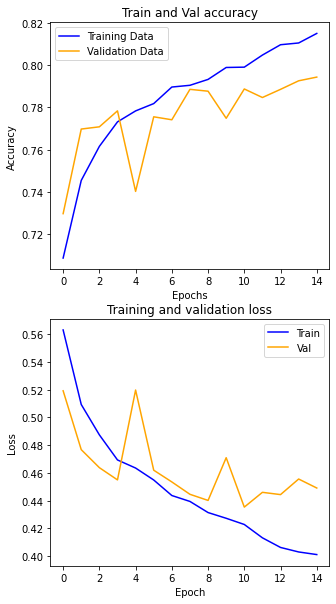

In [ ]:
plot_epochs(history_tl)


In [ ]:
scores=model_tl.evaluate(x_test,y_test)
print("Test loss {:.3f}".format(scores[0]))
print("Test acc {:.3f}".format(scores[1]))

149/149 [==============================] - 2s 16ms/step - loss: 0.4474 - acc: 0.7927
Test loss 0.447
Test acc 0.793


##### ResNet

In [ ]:
def make_model(outputsize=2, loss='categorical_crossentropy', lastactivation = 'softmax', metric = 'acc'):
  model = Sequential()
  model.add(Conv2D(16, kernel_size=(2,2),input_shape=(48,48,1),activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2), strides=2))
  model.add(Conv2D(32, kernel_size=(2,2), activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2), strides=2))
  model.add(Conv2D(64, kernel_size=(2,2), activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2), strides=2))
  model.add(Conv2D(128, kernel_size=(2,2), activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2), strides=2))
  model.add(Dense(128,input_shape =(784,), activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2), strides=2))
  model.add(Flatten())
  model.add(Dense(512, activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Dense(128,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Dense(64,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dense(16, activation = 'relu'))
  model.add(Dense(outputsize, activation = lastactivation))
  model.compile(optimizer='adam', loss = loss, metrics=[metric])
  return model

In [ ]:
y_age = df['age'].to_numpy()
y_ethnicity = df['ethnicity']
y_gender = df['gender']
x = df['pixels_np']
x=np.stack(x)
x=x.reshape(-1,48,48,1)
x_tl = x.repeat(3, axis=-1)


nasnet= tf.keras.applications.resnet_v2.ResNet50V2(
    input_shape=(48,48,3),
    weights=None,
    input_tensor=None,
    pooling=max,
    classes=5
)
#include_top=False bencause I'll modify fully connected layers
# weights='imagenet' because I want the weights used in the imagenet competition
print(nasnet.summary())


Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_39 (InputLayer)          [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_39[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 26, 26, 64)   0           ['conv1_conv[0][0]']             
                                                                                         

In [ ]:
inputs = tf.keras.Input(shape=(48, 48, 3))
inputs = tf.keras.applications.resnet.preprocess_input(inputs)
nst = nasnet(inputs,training=True)
modelx = tf.keras.Model(inputs, nst)
modelx.compile(optimizer='Adam',loss='categorical_crossentropy',metrics='acc')
stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
x_dev, x_test, y_dev, y_test = train_test_split(x_tl, y_ethnicity, test_size = 0.2, random_state = 1)
l = len(y_dev.unique())
y_dev = to_categorical(y_dev, l)
y_test = to_categorical(y_test, l)

In [ ]:

with tf.device('/device:GPU:0'):
  callback=modelx.fit(x_dev,y_dev,batch_size=64,epochs=25, verbose=1, validation_split=0.3,callbacks=[stop])

Epoch 1/25
208/208 [==============================] - 47s 176ms/step - loss: 1.0994 - acc: 0.5975 - val_loss: 0.9390 - val_acc: 0.6615
Epoch 2/25
208/208 [==============================] - 34s 165ms/step - loss: 0.8532 - acc: 0.6975 - val_loss: 0.8715 - val_acc: 0.6910
Epoch 3/25
208/208 [==============================] - 33s 158ms/step - loss: 0.7607 - acc: 0.7320 - val_loss: 0.8131 - val_acc: 0.7186
Epoch 4/25
208/208 [==============================] - 33s 158ms/step - loss: 0.6786 - acc: 0.7623 - val_loss: 0.7893 - val_acc: 0.7230
Epoch 5/25
208/208 [==============================] - 33s 158ms/step - loss: 0.6229 - acc: 0.7841 - val_loss: 0.7544 - val_acc: 0.7402
Epoch 6/25
208/208 [==============================] - 33s 158ms/step - loss: 0.5671 - acc: 0.8044 - val_loss: 0.7608 - val_acc: 0.7357
Epoch 7/25
208/208 [==============================] - 33s 158ms/step - loss: 0.4980 - acc: 0.8260 - val_loss: 0.7623 - val_acc: 0.7476
Epoch 8/25
208/208 [==============================] - 3

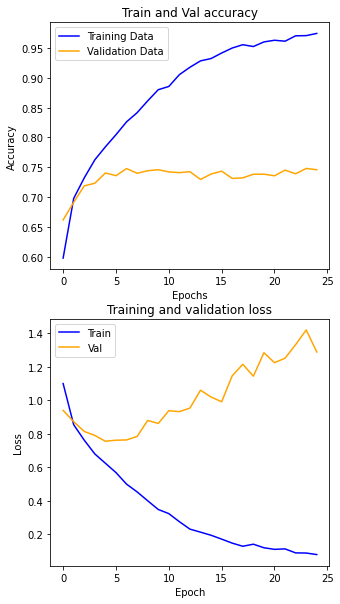

In [ ]:
plot_epochs(callback)
#choose epoch 6 to do prediction

In [ ]:
score = modelx.evaluate(x_test,y_test)
print("Test loss {:.3f}".format(score[0]))
print("Test acc {:.3f}".format(score[1]))

149/149 [==============================] - 7s 39ms/step - loss: 1.3224 - acc: 0.7425
Test loss 1.322
Test acc 0.742


#### Age

##### Baseline

In [ ]:
x_train,y_train,x_val,y_val,x_test,y_test = train_test_val_split(x,y_age)

In [ ]:
model1 = Sequential()
model1.add(layers.Conv2D(16, kernel_size=(2,2),input_shape=(48,48,1),activation = 'relu'))
model1.add(layers.MaxPooling2D())
model1.add(layers.Conv2D(32, kernel_size=(2,2),activation = 'relu'))
model1.add(layers.MaxPooling2D())
model1.add(layers.Conv2D(64, kernel_size=(2,2),activation = 'relu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Flatten())
model1.add(layers.Dense(64))
model1.add(layers.Dense(1))

model1.compile(loss='mean_squared_error', optimizer='adam',  metrics=[tf.keras.metrics.RootMeanSquaredError()])

model1.fit(x_train, y_train,
           validation_data = (x_val,y_val),
                      batch_size = 32,
                      epochs = 15)

Epoch 1/15
415/415 [==============================] - 6s 8ms/step - loss: 357.0342 - root_mean_squared_error: 18.8953 - val_loss: 232.1402 - val_root_mean_squared_error: 15.2361
Epoch 2/15
415/415 [==============================] - 2s 5ms/step - loss: 225.4617 - root_mean_squared_error: 15.0154 - val_loss: 194.5340 - val_root_mean_squared_error: 13.9475
Epoch 3/15
415/415 [==============================] - 2s 5ms/step - loss: 201.7665 - root_mean_squared_error: 14.2045 - val_loss: 177.3153 - val_root_mean_squared_error: 13.3160
Epoch 4/15
415/415 [==============================] - 2s 5ms/step - loss: 179.4277 - root_mean_squared_error: 13.3951 - val_loss: 169.6551 - val_root_mean_squared_error: 13.0252
Epoch 5/15
415/415 [==============================] - 2s 5ms/step - loss: 170.3161 - root_mean_squared_error: 13.0505 - val_loss: 158.2886 - val_root_mean_squared_error: 12.5813
Epoch 6/15
415/415 [==============================] - 2s 5ms/step - loss: 158.2697 - root_mean_squared_error: 

In [ ]:
scores=model1.evaluate(x_test,y_test)
print("Test loss {:.3f}".format(scores[0]))
print("Test acc {:.3f}".format(scores[1]))

149/149 [==============================] - 1s 4ms/step - loss: 115.5798 - root_mean_squared_error: 10.7508
Test loss 115.580
Test acc 10.751


##### Transfer learning 

In [ ]:
#y_age_t = to_categorical(y_age)
y_age = df['age'].to_numpy()
y_ethnicity = df['ethnicity']
y_gender = df['gender']
x = df['pixels_np']
x=np.stack(x)
x=x.reshape(-1,48,48,1)
x_tl = x.repeat(3, axis=-1)
x_dev, x_test, y_dev, y_test = train_test_split(x_tl, y_age, test_size = 0.2, random_state = 1)



In [ ]:
mbv3_age= tf.keras.applications.MobileNetV3Large(
    input_shape=(48,48,3),
    alpha=1.0,
    minimalistic=False,
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    dropout_rate=0.2,
    include_preprocessing=True,
)

#mbv3_age.compile(optimizer='Adam',loss='mse',metrics='mse')
stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
inputs = tf.keras.Input(shape=(48, 48, 3))
mbv = mbv3_age(inputs,training=False)
mbv = tf.keras.layers.GlobalAveragePooling2D()(mbv)
mbv = tf.keras.layers.Dropout(0.2)(mbv)
#mbv=layers.Conv2D(32, kernel_size=(2,2),activation = 'relu')(mbv)
#mbv=layers.Dropout(0.3)(mbv)

#mbv=layers.Flatten()(mbv)
#mbv=layers.Dense(64)(mbv)
mbv = tf.keras.layers.Dense(1)(mbv)

model = tf.keras.Model(inputs, mbv)

model.compile(optimizer='Adam',loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])
stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)




In [ ]:
model.compile(optimizer='Adam',loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])
with tf.device('/device:GPU:0'):
  callback=model.fit(x_dev,y_dev,batch_size=128,epochs=24, verbose=1, validation_split=0.2,callbacks=[stop])

Epoch 1/24
119/119 [==============================] - 27s 135ms/step - loss: 4135.4585 - root_mean_squared_error: 64.3075 - val_loss: 210.1849 - val_root_mean_squared_error: 14.4978
Epoch 2/24
119/119 [==============================] - 14s 119ms/step - loss: 175.4213 - root_mean_squared_error: 13.2447 - val_loss: 144.3530 - val_root_mean_squared_error: 12.0147
Epoch 3/24
119/119 [==============================] - 14s 120ms/step - loss: 141.9041 - root_mean_squared_error: 11.9124 - val_loss: 141.4924 - val_root_mean_squared_error: 11.8951
Epoch 4/24
119/119 [==============================] - 14s 122ms/step - loss: 129.2503 - root_mean_squared_error: 11.3688 - val_loss: 124.1224 - val_root_mean_squared_error: 11.1410
Epoch 5/24
119/119 [==============================] - 14s 119ms/step - loss: 119.4221 - root_mean_squared_error: 10.9280 - val_loss: 118.1957 - val_root_mean_squared_error: 10.8718
Epoch 6/24
119/119 [==============================] - 15s 123ms/step - loss: 115.7761 - root_m

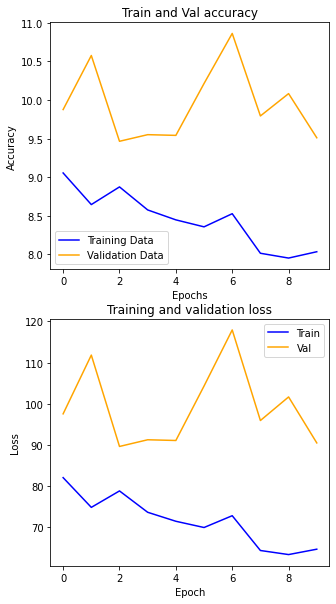

In [ ]:
acc = callback.history['root_mean_squared_error']
val_acc = callback.history['val_root_mean_squared_error']
loss = callback.history['loss']
val_loss = callback.history['val_loss']

epochs = range(len(acc))

fig,ax = plt.subplots(2,1 , figsize=(5, 10))

ax[0].set_title('Train and Val accuracy')
ax[0].plot(epochs, acc, color='blue', label='Training Data')
ax[0].plot(epochs, val_acc, color='orange', label='Validation Data')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()


ax[1].set_title('Training and validation loss')
ax[1].plot(epochs, loss, color='blue', label='Train')
ax[1].plot(epochs, val_loss, color='orange', label='Val')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

In [ ]:
score = model.evaluate(x_test,y_test)
print("Test loss {:.3f}".format(score[0]))
print("Test acc {:.3f}".format(score[1]))

149/149 [==============================] - 3s 23ms/step - loss: 95.6872 - root_mean_squared_error: 9.7820
Test loss 95.687
Test acc 9.782


In [ ]:
resnet = tf.keras.applications.resnet_v2.ResNet50V2(
    input_shape=(48,48,3),
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
)
inputs = tf.keras.Input(shape=(48, 48, 3))
tf.keras.applications.resnet_v2.preprocess_input(inputs)
res = resnet(inputs,training=False)
res = tf.keras.layers.GlobalAveragePooling2D()(res)
res = tf.keras.layers.Dropout(0.2)(res)
#mbv=layers.Conv2D(32, kernel_size=(2,2),activation = 'relu')(mbv)
#mbv=layers.Dropout(0.3)(mbv)

#mbv=layers.Flatten()(mbv)
#mbv=layers.Dense(64)(mbv)
res = tf.keras.layers.Dense(1)(res)

model2 = tf.keras.Model(inputs, res)

model2.compile(optimizer='Adam',loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])
with tf.device('/device:GPU:0'):
  callback2=model2.fit(x_dev,y_dev,batch_size=128,epochs=24, verbose=1, validation_split=0.2,callbacks=[stop])

94683136/94668760 [==============================] - 1s 0us/step
Epoch 1/24
119/119 [==============================] - 44s 275ms/step - loss: 800711.1250 - root_mean_squared_error: 894.8246 - val_loss: 210.4561 - val_root_mean_squared_error: 14.5071
Epoch 2/24
119/119 [==============================] - 28s 239ms/step - loss: 158.8849 - root_mean_squared_error: 12.6050 - val_loss: 133.0406 - val_root_mean_squared_error: 11.5343
Epoch 3/24
119/119 [==============================] - 28s 238ms/step - loss: 115.4122 - root_mean_squared_error: 10.7430 - val_loss: 116.0564 - val_root_mean_squared_error: 10.7729
Epoch 4/24
119/119 [==============================] - 28s 238ms/step - loss: 102.9541 - root_mean_squared_error: 10.1466 - val_loss: 111.5051 - val_root_mean_squared_error: 10.5596
Epoch 5/24
119/119 [==============================] - 28s 239ms/step - loss: 90.9956 - root_mean_squared_error: 9.5392 - val_loss: 96.8912 - val_root_mean_squared_error: 9.8433
Epoch 6/24
119/119 [==========

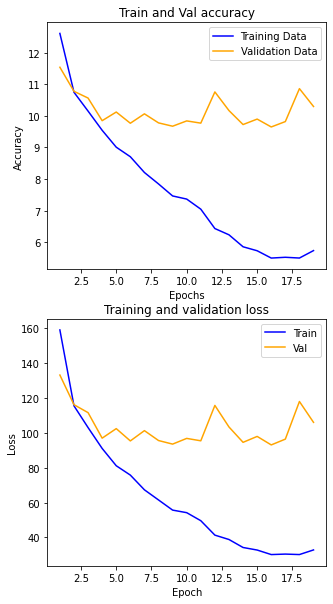

In [ ]:
acc = callback2.history['root_mean_squared_error']
val_acc = callback2.history['val_root_mean_squared_error']
loss = callback2.history['loss']
val_loss = callback2.history['val_loss']

epochs = range(len(acc))

fig,ax = plt.subplots(2,1 , figsize=(5, 10))

ax[0].set_title('Train and Val accuracy')
ax[0].plot(epochs[1:], acc[1:], color='blue', label='Training Data')
ax[0].plot(epochs[1:], val_acc[1:], color='orange', label='Validation Data')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()


ax[1].set_title('Training and validation loss')
ax[1].plot(epochs[1:], loss[1:], color='blue', label='Train')
ax[1].plot(epochs[1:], val_loss[1:], color='orange', label='Val')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

In [ ]:
score = model.evaluate(x_test,y_test)
print("Test loss {:.3f}".format(score[0]))
print("Test acc {:.3f}".format(score[1]))

149/149 [==============================] - 5s 31ms/step - loss: 95.6872 - root_mean_squared_error: 9.7820
Test loss 95.687
Test acc 9.782
